In [1]:
!pip install opencv-python matplotlib tensorflow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- -------------------------------------------------------------------------
absl-py                       1.4.0
aiofiles                      22.1.0
aiosqlite                     0.19.0
anyio                         4.0.0
apache-beam                   2.46.0
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.0
arrow                         1.2.3
asttokens                     2.4.0
astunparse                    1.6.3
async-lru                     2.0.4
attrs                         23.1.0
avro-python3                  1.10.2
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.12.2
bio                           1.6.0
biopython                     1.81
biothings-client              0.3.1
bleach                        6.0.


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys
sys.path.append('C:\Program Files\Python38\Lib\site-packages')

In [4]:
sys.path.append(r'C:\Users\Yasin Orta\AppData\Roaming\Python\Python38\site-packages')

In [5]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import tensorflow as tf
import imghdr

In [6]:
print(sys.version)
print(cv2.__version__)
print(tf.__version__)

3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]
4.8.1
2.10.1


In [7]:
data_dir = 'data'

In [8]:
os.listdir(data_dir)

['happy', 'redBrickData']

In [9]:
os.listdir(os.path.join(data_dir, 'happy'))

['happyNo (1).jpeg',
 'happyNo (1).jpg',
 'happyNo (1).png',
 'happyNo (10).jpeg',
 'happyNo (10).jpg',
 'happyNo (11).jpeg',
 'happyNo (11).jpg',
 'happyNo (12).jpg',
 'happyNo (13).jpg',
 'happyNo (14).jpg',
 'happyNo (15).jpg',
 'happyNo (16).jpg',
 'happyNo (17).jpg',
 'happyNo (18).jpg',
 'happyNo (19).jpg',
 'happyNo (2).jpeg',
 'happyNo (2).jpg',
 'happyNo (2).png',
 'happyNo (20).jpg',
 'happyNo (21).jpg',
 'happyNo (22).jpg',
 'happyNo (23).jpg',
 'happyNo (24).jpg',
 'happyNo (25).jpg',
 'happyNo (26).jpg',
 'happyNo (27).jpg',
 'happyNo (28).jpg',
 'happyNo (29).jpg',
 'happyNo (3).jpeg',
 'happyNo (3).jpg',
 'happyNo (3).png',
 'happyNo (30).jpg',
 'happyNo (31).jpg',
 'happyNo (32).jpg',
 'happyNo (33).jpg',
 'happyNo (34).jpg',
 'happyNo (35).jpg',
 'happyNo (36).jpg',
 'happyNo (37).jpg',
 'happyNo (38).jpg',
 'happyNo (39).jpg',
 'happyNo (4).jpeg',
 'happyNo (4).jpg',
 'happyNo (4).png',
 'happyNo (40).jpg',
 'happyNo (41).jpg',
 'happyNo (42).jpg',
 'happyNo (43).jpg'

In [10]:
os.listdir(os.path.join(data_dir, 'redBrickData'))

['brickNo (1).jpeg',
 'brickNo (1).jpg',
 'brickNo (1).png',
 'brickNo (10).jpeg',
 'brickNo (10).jpg',
 'brickNo (100).jpg',
 'brickNo (11).jpeg',
 'brickNo (11).jpg',
 'brickNo (12).jpeg',
 'brickNo (12).jpg',
 'brickNo (13).jpeg',
 'brickNo (13).jpg',
 'brickNo (14).jpg',
 'brickNo (15).jpg',
 'brickNo (16).jpg',
 'brickNo (17).jpg',
 'brickNo (18).jpg',
 'brickNo (19).jpg',
 'brickNo (2).jpeg',
 'brickNo (2).jpg',
 'brickNo (2).png',
 'brickNo (20).jpg',
 'brickNo (21).jpg',
 'brickNo (22).jpg',
 'brickNo (23).jpg',
 'brickNo (24).jpg',
 'brickNo (25).jpg',
 'brickNo (26).jpg',
 'brickNo (27).jpg',
 'brickNo (28).jpg',
 'brickNo (29).jpg',
 'brickNo (3).jpg',
 'brickNo (3).png',
 'brickNo (30).jpg',
 'brickNo (31).jpg',
 'brickNo (32).jpg',
 'brickNo (33).jpg',
 'brickNo (34).jpg',
 'brickNo (35).jpg',
 'brickNo (36).jpg',
 'brickNo (37).jpg',
 'brickNo (38).jpg',
 'brickNo (39).jpg',
 'brickNo (4).jpg',
 'brickNo (4).png',
 'brickNo (40).jpg',
 'brickNo (41).jpg',
 'brickNo (42).j

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 193 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

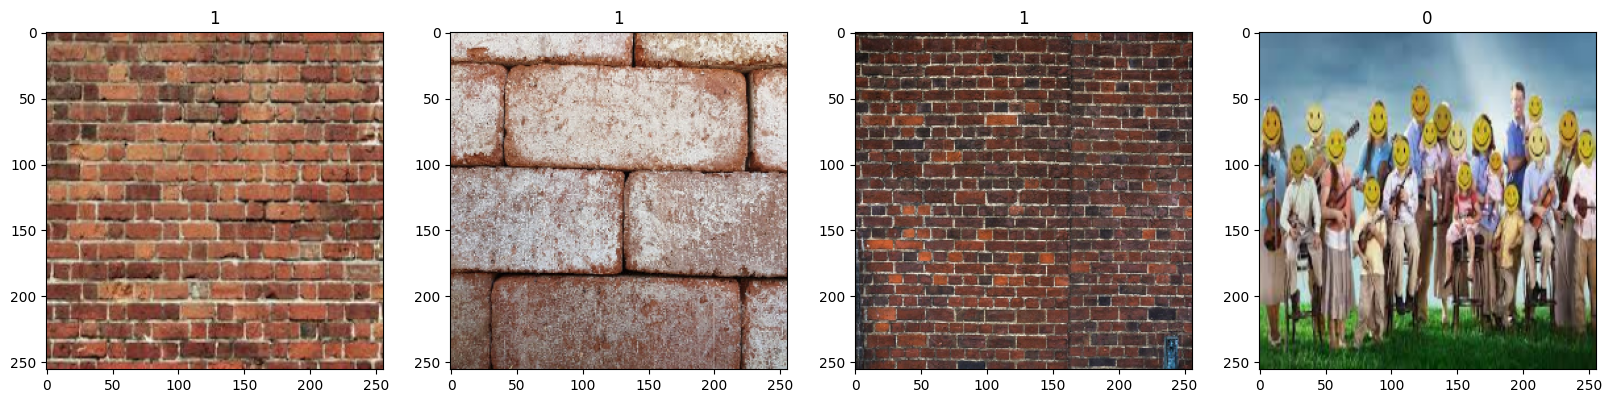

In [18]:
# Class 1 equals brick 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()[0].max()

1.0

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 8s 1s/step - loss: 1.0896 - accuracy: 0.4844 - val_loss: 0.4716 - val_accuracy: 0.9062
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.3664 - accuracy: 0.8438 - val_loss: 0.3749 - val_accuracy: 0.8125
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.2445 - accuracy: 0.9062 - val_loss: 0.1499 - val_accuracy: 0.9062
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.1927 - accuracy: 0.9375 - val_loss: 0.1099 - val_accuracy: 0.9375
Epoch 5/20
4/4 [==============================] - 7s 1s/step - loss: 0.0994 - accuracy: 0.9688 - val_loss: 0.0666 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.0755 - accuracy: 0.9766 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 7s 1s/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 8/20
4/4 [=========================

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [42]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


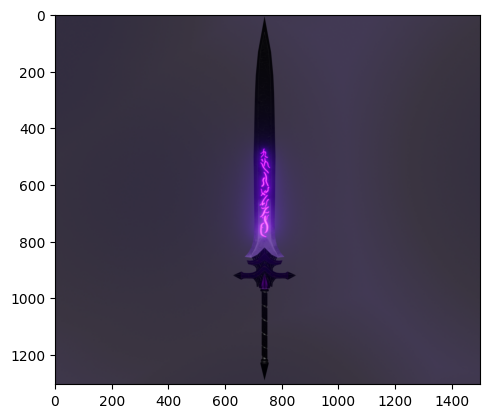

In [54]:
imgtobechecked = cv2.imread('swordTest.png')
plt.imshow(cv2.cvtColor(imgtobechecked, cv2.COLOR_BGR2RGB))
plt.show()

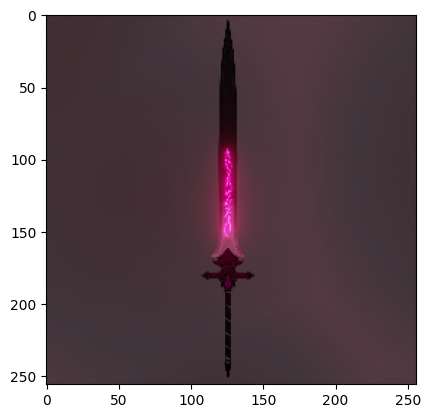

In [55]:
resize = tf.image.resize(imgtobechecked, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [57]:
yhat

array([[0.6215248]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Brick')
else:
    print(f'Predicted class is NOT Brick')

Predicted class is Brick


In [48]:
model.save(os.path.join('models','newclassificationModel.h5'))